In [48]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [49]:
criterion = "romantic"
parameter = "Walc"

In [50]:
math_df = pd.read_csv('student-mat.csv')
por_df = pd.read_csv('student-por.csv')
# concat dataframes vertically
df = pd.concat([math_df, por_df], axis=0)
# leave only Walc and Romantic columns
df = df[[parameter, criterion]]
print(df.head())
df.shape

   Walc romantic
0     1       no
1     1       no
2     3       no
3     1      yes
4     2       no


(1044, 2)

In [51]:
# seperate the data into two groups based on the 'romantic' column
criterion_yes = df[df[criterion] == "yes"][parameter]
criterion_no = df[df[criterion] == "no"][parameter]
#print the avarage of each distribution
print(f"Average {criterion} Yes: {criterion_yes.mean()}")
print(f"Average {criterion} No: {criterion_no.mean()}")

Average romantic Yes: 2.256064690026954
Average romantic No: 2.300148588410104


In [52]:
print(f"Number of {criterion} Yes: {criterion_yes.count()}")
print(f"Number of {criterion} No: {criterion_no.count()}")

Number of romantic Yes: 371
Number of romantic No: 673


In [53]:
# print distributation of values on each group meanin how many get value of 0 how many 1 like a dice
print(f"Distribution {criterion} Yes:\n{criterion_yes.value_counts(normalize=True)}")
print(f"Distribution {criterion} No:\n{criterion_no.value_counts(normalize=True)}")

Distribution romantic Yes:
Walc
1    0.390836
2    0.226415
3    0.196765
4    0.107817
5    0.078167
Name: proportion, dtype: float64
Distribution romantic No:
Walc
1    0.375929
2    0.224368
3    0.188707
4    0.145617
5    0.065379
Name: proportion, dtype: float64


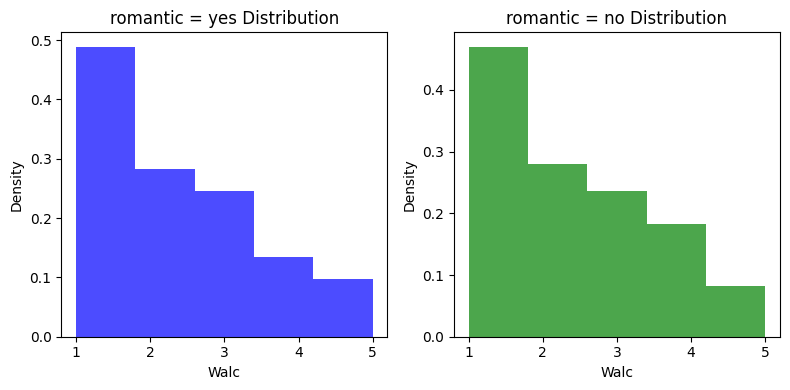

In [54]:
# plot the distribution of Walc for both groups normalized
plt.figure(figsize=(8, 4))

# Histogram for 'Pstatus' == "T" (Yes)
plt.subplot(1, 2, 1)
plt.hist(criterion_yes, bins=5, alpha=0.7, color="blue", density=True)
plt.title(f"{criterion} = yes Distribution")
plt.xlabel("Walc")
plt.ylabel("Density")

# Histogram for 'Pstatus' == "A" (No)
plt.subplot(1, 2, 2)
plt.hist(criterion_no, bins=5, alpha=0.7, color="green", density=True)
plt.title(f"{criterion} = no Distribution")
plt.xlabel("Walc")
plt.ylabel("Density")

# Adjust layout and display
plt.tight_layout()
plt.show()
# perform the t-test

In [55]:
# use u-test to compare the two groups
u_statistic, p_value = stats.mannwhitneyu(
    criterion_no, criterion_yes, alternative="less"
)
print(f"U-statistic: {u_statistic}, p-value: {p_value}")
# check if the p-value is less than 0.05
if p_value < 0.05:
    print(
        "There is a significant difference in Walc between students with and without a romantic relationship."
    )
else:
    print(
        "There is no significant difference in Walc between students with and without a romantic relationship."
    )

U-statistic: 127540.0, p-value: 0.7265162254376071
There is no significant difference in Walc between students with and without a romantic relationship.
